### **Read Data**

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
# Laptop GPU is busy with rendering screen ...
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  
import pickle
import glob
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
#data_dir = '../../Sensorfloors/summerschool2020/Robot_Data/train/*'


path_dataset = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/'

#data_dir = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/30092022/train/*'


os.chdir(path_dataset)

file_list = sorted(glob.glob(path_dataset + 'train/*.csv'))

print(os.getcwd())

# dfs = []
for input_file in file_list:
    print('Loading:', input_file)
#     dfs.append(pd.read_csv(input_file).drop(['data'], axis=1))

/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run1_diagonal.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run1_horizontal.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run1_vertical.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run2_diagonal.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run2_horizontal.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run2_vertical.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/D

In [3]:
# import sys
# modules_dir = '../../Sensorfloors/REAML2020Hackathon/modules/'
# sys.path.insert(1, '../../Sensorfloors/REAML2020Hackathon/')

from modules_lib.data import KEYS as keys
from modules_lib.data import get_data_from_data_frame
from modules_lib.data import read_data

### Generate Pickle FIle

In [ ]:
# # #Test read file and build frames

# train = []
# n_files = len(file_list)
# y_list = []
# t_list = []
# X_list = []

# path_pickle = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/Coding/vicon_pos_converter_data/'

# os.chdir(path_pickle)

# offset = 2459877.0729167# 2410 13.45 #30.09 10.00: 2459852.9166667

# data_pickle_file = 'train_pickle_file_24102022_with_run4.pkl'

# for file_index, file in enumerate(file_list):
#     print('Loading:', file)
        
#     frames, y, t, X = read_data(file, offset)
            
#     X_list.append(X)
#     y_list.append(y)
#     t_list.append(t)
#     train.append(frames)
#     # write data
#     pickle_data = [train, y_list, X_list, t_list]
#     with open(data_pickle_file, 'wb') as handle:
#         pickle.dump(pickle_data, handle, protocol=3)


# print(len(X_list),len(y_list),len(t_list))

### Load Pickle FIle

In [4]:
train = []
n_files = len(file_list)
y_list = []
t_list = []
X_list = []
offset = 2459877.0729167

path_pickle = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/Coding/vicon_pos_converter_data/'

os.chdir(path_pickle)

data_pickle_file = 'train_pickle_file_24102022_with_run4.pkl' #train_pickle_file_24102022_with_run4.pkl

if os.path.exists(data_pickle_file):
    print('Reloading from pickle file')
    with open(data_pickle_file, 'rb') as handle:
         train, y_list, X_list, t_list = pickle.load(handle)
else:
    for file_index, file in enumerate(file_list):
        print('Loading:', file)
        
        frames, y, t, X = read_data(file, offset)
            
        X_list.append(X)
        y_list.append(y)
        t_list.append(t)
        train.append(frames)
        
    # write data
    pickle_data = [train, y_list, X_list, t_list]
    with open(data_pickle_file, 'wb') as handle:
        pickle.dump(pickle_data, handle, protocol=3)

Reloading from pickle file


In [4]:
#t avg old dataset 0.0631 to 0.1939
num = 0

for i in range(len(t_list)):
    #print(t_list[i].min(),t_list[i].max())
    num += len(t_list[i])
print(num)


48339


## Compute sensor normalization

In [5]:
#import numpy as np
# --------
# settings
# --------
norm_use_training_data = True
treat_sensors_equally = False
# --------

home_path = '/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter/'
os.chdir(home_path)

if treat_sensors_equally:
    norm_axes = (0, 1, 2)
else:
    norm_axes = 0

sensor_norm = np.zeros_like(X_list[0][0])
num_frames = 0
X_concat = np.concatenate(X_list, axis=0)
sensor_bias = np.nanmean(
    X_concat, axis=norm_axes, keepdims=True)[0]
sensor_std = np.nanstd(
    X_concat, axis=norm_axes, keepdims=True)[0] + 1e-7
print('Total number of frames:', X_concat.shape[0])
print(sensor_bias.shape)
print(sensor_std.shape)


#with open('data/normalization/norm_data_00000100.pkl', 'rb') as handle:
with open('data/normalization/sensor_normalization_eqFalse_trTrue_24102022_with_r4.pkl', 'rb') as handle:
    t_norm, X_norm = pickle.load(handle, encoding='latin1')
    sensor_bias2 = np.nanmean(
        X_norm, axis=norm_axes, keepdims=True)[0]
    sensor_std2 = np.nanstd(
        X_norm, axis=norm_axes, keepdims=True)[0] + 1e-7
    t_diff = np.diff(t_norm, axis=0)
    #plt.hist(t_diff, bins=30)
    
print(np.nanmean(X_concat, axis=(0, 1, 2)))
print(np.nanmean(X_norm, axis=(0, 1, 2)))

print(np.nanstd(X_concat, axis=(0, 1, 2)))
print(np.nanstd(X_norm, axis=(0, 1, 2)))

# save sensor normalization
if norm_use_training_data:
    pass
else:
    sensor_bias = sensor_bias2
    sensor_std = sensor_std2
    
# sensor_norm_file = 'data/normalization/sensor_normalization_eq{}_tr{}_09092022.pkl'.format(
#     treat_sensors_equally, norm_use_training_data)
sensor_norm_file = 'data/normalization/sensor_normalization_eqFalse_trTrue_24102022_with_r4.pkl'.format(
    treat_sensors_equally, norm_use_training_data)
if os.path.exists(sensor_norm_file):
    print('WARNING: File {} already exists. Aborting!'.format(
        sensor_norm_file))
else:
    with open(sensor_norm_file, 'wb') as handle:
        pickle.dump([sensor_bias, sensor_std], 
                    handle, protocol=3)

print('Sensor normalization file:', sensor_norm_file)


Total number of frames: 50349
(23, 15, 10)
(23, 15, 10)
[ 5.00462116e-02  1.18597324e-01  9.69793110e-01 -8.55238346e-01
  9.22393401e-01  7.23537146e-01  1.49858522e+01 -1.05495298e+00
  3.03916666e+01 -7.91686463e+01]
2.5439062684374294
[2.97403763e-02 5.03621507e-02 2.35886836e-01 1.23987289e+00
 6.80683857e-01 8.11797236e-01 9.25740252e+01 7.83481528e+01
 1.18388448e+02 2.10423172e+01]
4.501477064252892
Sensor normalization file: data/normalization/sensor_normalization_eqFalse_trTrue_24102022_with_r4.pkl


## Vicon Sensors

The sensors are arranged on a perfect rectangular 23x15 grid with distances of 1 in x-and y-direction.

In [6]:
home_path = '/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter/'
os.chdir(home_path)

vicon_file = 'vicon_node_positions.csv'
df_vicon = pd.read_csv(vicon_file)

# get arrays of coordinates
vicon_coords = np.empty([23, 15, 2])
for strip_id in range(1, 24):
    for node_id in range(1, 16):
        mask = np.logical_and(
            df_vicon['strip_id'] == strip_id,
            df_vicon['node_id'] == node_id)
        vicon_coords[strip_id-1, node_id-1, 0] = df_vicon.vicon_x[mask]
        vicon_coords[strip_id-1, node_id-1, 1] = df_vicon.vicon_y[mask]
print(df_vicon.min())
print(df_vicon.max())
print(df_vicon.node_id.size, 23*15)
df_vicon.head()

strip_id     1.000
node_id      1.000
vicon_x    -11.185
vicon_y     -6.425
dtype: float64
strip_id    23.000
node_id     15.000
vicon_x     10.815
vicon_y      7.575
dtype: float64
345 345


,strip_id,node_id,vicon_x,vicon_y
0,1.0,1.0,-11.185,7.575
1,1.0,2.0,-11.185,6.575
2,1.0,3.0,-11.185,5.575
3,1.0,4.0,-11.185,4.575
4,1.0,5.0,-11.185,3.575


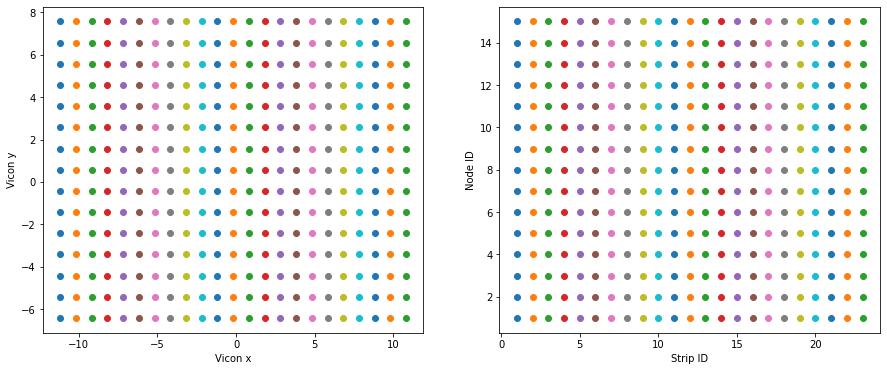

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for strip_id in range(1, 24):
    mask = df_vicon.strip_id == strip_id
    #print(np.unique(np.diff(df_vicon.vicon_x[mask])))
    #print(np.unique(np.diff(df_vicon.vicon_y[mask])))
    if np.sum(mask) > 0:
        axes[0].scatter(df_vicon.vicon_x[mask], df_vicon.vicon_y[mask], 
                        label='Strip: {:02d}'.format(strip_id))
        axes[1].scatter(df_vicon.strip_id[mask], df_vicon.node_id[mask], 
                        label='Strip: {:02d}'.format(strip_id))
    axes[0].set_xlabel('Vicon x')
    axes[0].set_ylabel('Vicon y')
    axes[1].set_xlabel('Strip ID')
    axes[1].set_ylabel('Node ID')
    

## Predict with basic CNN

In [6]:
import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
from egenerator.utils import basis_functions

import tensorflow as tf
from keras import datasets, layers, models
from keras import layers as tfs

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten
from keras.utils import GeneratorEnqueuer, to_categorical, np_utils
from tqdm.keras import TqdmCallback


2022-10-31 20:24:45.962212: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [7]:
def limit_sigma(y_pred):
    mu = y_pred[..., :2]
    sigma = y_pred[..., 2:4]
    r = y_pred[..., 4:]
    sigma = tf.nn.elu(sigma) + 1.001
    r = tf.nn.elu(r) + 1.001
    y_pred = tf.concat([mu, sigma, r], axis=-1)
    return y_pred


model_name = 'coords'
add_coordinates = True

num_inputs = 4
if add_coordinates:
    num_inputs = 6

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(23, 15, num_inputs))) 

if model_name == 'basic':
    model.add(layers.Dropout(rate=0.01)) 
    model.add(layers.Conv2D(8, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(16, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(16, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(32, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='elu'))
    
    optimizer = tf.optimizers.Adam(
        learning_rate=0.001,
        amsgrad=False,
    )
    batch_size = 1
    epochs = 25
    
elif model_name == 'test':
    model.add(layers.Dropout(rate=0.01)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Dense(128, activation='elu'))
    model.add(layers.Dense(128, activation='elu'))
    
    optimizer = tf.optimizers.Adam(
        learning_rate=0.0001,
        amsgrad=True,
    )
    batch_size = 1
    epochs = 50 #25 (current best)#20

elif model_name == 'augmented':
    #odel.add(layers.Dropout(rate=0.01)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Dense(128, activation='elu'))
    model.add(layers.Dense(128, activation='elu'))
    
    optimizer = tf.optimizers.Adam(
        learning_rate=0.0001,
        amsgrad=True,
    )
    batch_size = 1
    epochs = 25 
elif model_name == 'coords':
    model.add(layers.Dropout(rate=0.01)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    #model.add(layers.SpatialDropout2D(rate=0.05)) 
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    #model.add(layers.SpatialDropout2D(rate=0.05)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))
    #model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    #model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(rate=0.1)) 
    model.add(layers.Dense(128, activation='elu'))
    model.add(layers.Dense(128, activation='elu'))
    
    optimizer = tf.optimizers.Adam(
        learning_rate=0.0001,
        amsgrad=True,
    )
    batch_size = 1
    epochs = 35
    #kernel_regulizer = tf.keras.regularizers.l1(1e-5)
elif model_name == 'coords2':
    #model.add(layers.Dropout(rate=0.01)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    #model.add(layers.Dropout(rate=0.05)) 
    #model.add(layers.SpatialDropout2D(rate=0.01)) 
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu',
                            padding='same'))
    #model.add(layers.Dropout(rate=0.05)) 
    #model.add(layers.SpatialDropout2D(rate=0.01)) 
    model.add(layers.Conv2D(64, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(96, (3, 3), activation='elu',
                            padding='same'))
    #model.add(layers.Dropout(rate=0.05))
    model.add(layers.Conv2D(96, (3, 3), activation='elu',
                            padding='same'))
    model.add(layers.Conv2D(96, (3, 3), activation='elu', 
                            padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    #model.add(layers.Dropout(rate=0.05)) 
    model.add(layers.Dense(192, activation='elu'))
    model.add(layers.Dense(192, activation='elu'))
    
    optimizer = tf.optimizers.Adam(
        learning_rate=0.0001,
        amsgrad=True,
    )

    optimizer = tf.optimizers.Adam(amsgrad=True)

    #kernel_regulizer = tf.keras.regularizers.l1(1e-5)
    
    batch_size = 1
    epochs = 35 
else:
    raise ValueError
model.add(layers.Dense(6))    
model.add(layers.Lambda(limit_sigma))
model.summary() 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 23, 15, 6)         0         
                                                                 
 conv2d (Conv2D)             (None, 23, 15, 64)        3520      
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 15, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 15, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 23, 15, 64)        0         
                                                                 
 average_pooling2d (AverageP  (None, 11, 7, 64)        0         
 ooling2D)                                                       
                                                        

2022-10-31 20:25:35.403436: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-31 20:25:35.403492: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (irfanflw-XPS-15-9510): /proc/driver/nvidia/version does not exist
2022-10-31 20:25:35.404229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
from modules_lib.model import loss_fun

model.compile(optimizer=optimizer, loss=loss_fun)

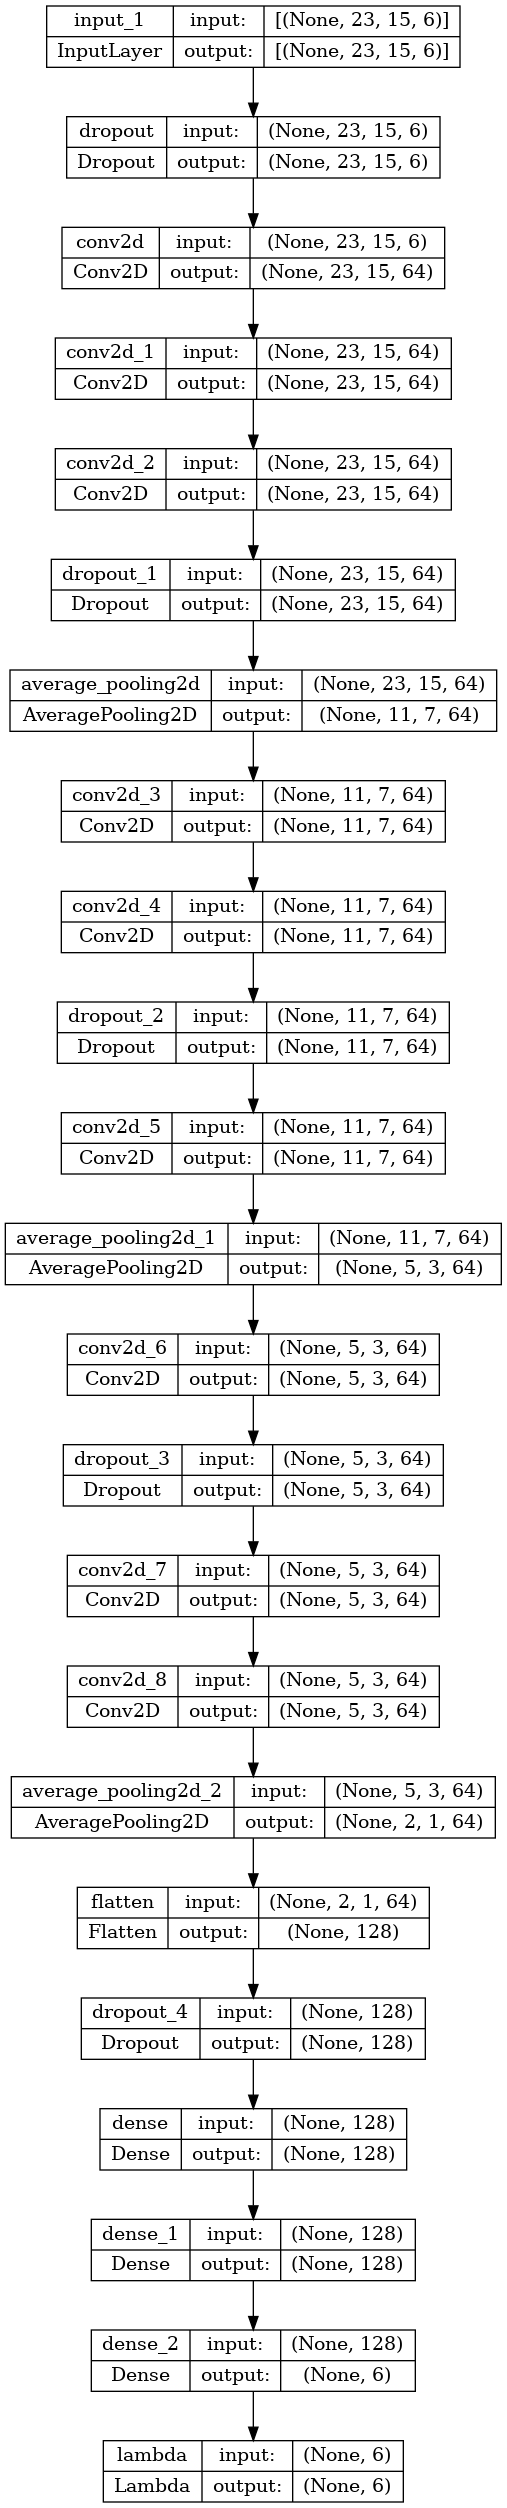

In [9]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot_008_24102022.png', show_shapes=True, show_layer_names=True)

**Split Train and Validation data**

In [10]:
from sklearn.model_selection import train_test_split

X_train_list = []
y_train_list = []
t_train_list = []
X_test_list = []
y_test_list = []
#t_test_list = []


for train_index in range(len(t_list)):
    X_data = np.array(X_list[train_index])
    X_data = (X_data - sensor_bias) / sensor_std
    X_data[~np.isfinite(X_data)] = 0
    y_data = np.array(y_list[train_index])
    t_data = np.array(t_list[train_index])

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.15, random_state=1000)
    
    # limit frame numbers
    # end = run_limit_dict[train_index] 
    # X_train = X_train[:end]
    # y_train = y_train[:end]
    # t_train = t_train[:end]
    
    X_train_list.append(X_train[..., 6:])
    #X_train_list.append(X_train)
    y_train_list.append(y_train)
    t_train_list.append(t_data)

    X_test_list.append(X_test[..., 6:])
    y_test_list.append(y_test)
    
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)
#t_train = np.concatenate(t_train_list, axis=0)
y_train_norm = y_train / 10.
print('train', X_train.shape, y_train.shape, 'test:', X_test.shape, y_test.shape)

train (42792, 23, 15, 4) (42792, 2) test: (7557, 23, 15, 4) (7557, 2)


In [10]:
X_train_list = []
y_train_list = []
t_train_list = []
for train_index in range(len(t_list)):
    X_train = np.array(X_list[train_index])
    X_train = (X_train - sensor_bias) / sensor_std
    X_train[~np.isfinite(X_train)] = 0
    y_train = np.array(y_list[train_index])
    t_train = np.array(t_list[train_index])
    
    # limit frame numbers
    # end = run_limit_dict[train_index] 
    # X_train = X_train[:end]
    # y_train = y_train[:end]
    # t_train = t_train[:end]
    
    X_train_list.append(X_train[..., 6:])
    #X_train_list.append(X_train)
    y_train_list.append(y_train)
    t_train_list.append(t_train)
    
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
t_train = np.concatenate(t_train_list, axis=0)
y_train_norm = y_train / 10.
print('X_train', X_train.shape)

X_train (48339, 23, 15, 4)


#### Data Augmentation

In [ ]:
# get coordinates of symmetry axis
center_x, center_y = np.mean(vicon_coords, axis=(0, 1))

def flip_along_x_axis(X, y):
    X = np.array(X[:, :, ::-1, :])
    y = np.array(y)
    y[:, 1] = y[:, 1] - 2*(y[:, 1] - center_y)
    return X, y

def flip_along_y_axis(X, y):
    X = np.array(X[:, ::-1, :, :])
    y = np.array(y)
    y[:, 0] = y[:, 0] - 2*(y[:, 0] - center_x)
    return X, y

def convert_to_cell(x, y):
    '''
    This function takes a measurement in origin frame (x,y), convert it
    to a cell number and return it as (strip_id, node_id)
    '''
    def translate(value, leftMin, leftMax, rightMin, rightMax):
        # Figure out how 'wide' each range is
        leftSpan = leftMax - leftMin
        rightSpan = rightMax - rightMin

        # Convert the left range into a 0-1 range (float)
        valueScaled = 1.*(value - leftMin) / leftSpan

        # Convert the 0-1 range into a value in the right range.
        return rightMin + (valueScaled * rightSpan)

    predict_cell = np.zeros([len(y), 2])
    predict_cell[:, 0] = x + 11.185
    predict_cell[:, 1] = translate(y, -15+7.575, 7.575, 15, 0)
    predict_cell = np.round(predict_cell)

    return predict_cell
    
def shift_columns(X, y, n=4, keep_unshifted=True):

    # get current cell indices
    strip_id = convert_to_cell(y[:,0], y[:,1])[:, 0]
    
    # get events where there is enough space left and right
    mask = np.logical_and(strip_id > n, strip_id < 22-n)
    
    if not keep_unshifted:
        X = np.array(X[mask])
        y = np.array(y[mask])
        strip_id = strip_id[mask]

    # compute maximum allowed shift left or right
    shift_left = np.clip(strip_id - n, 0, float('inf'))
    shift_right = np.clip(22 - strip_id - n, 0, float('inf'))

    # sample random shift
    # Note: shift_right won't get sampled, but we use 0 
    # for that
    shifts = np.random.randint(
        low=-shift_left, 
        high=np.clip(shift_right, 1, float('inf')),
    )
    mask_z = shifts == 0
    shifts[mask_z] = shift_right[mask_z]
    mask = shifts == 0
    shifts[mask_z] = shift_left[mask_z]
    
    if keep_unshifted:
        shifts[mask] = 0
    
    # shift data
    X = np.roll(X, shifts, axis=1)
    y[:, 0] += shifts
    
    return X, y

def add_flip_augmentation(X, y):
    X_x, y_x = flip_along_x_axis(X, y)
    X_y, y_y = flip_along_y_axis(X, y)
    X = np.concatenate((X, X_x, X_y), axis=0)
    y = np.concatenate((y, y_x, y_y), axis=0)
    return X, y

def add_augmentations(X, y, n_shifts=3):
    #return add_flip_augmentation(X, y)
    X_list = [X]
    y_list = [y]
    for i in range(n_shifts):
        X_shift, y_shift = shift_columns(
            X, y, keep_unshifted=False)
        X_list.append(X_shift)
        y_list.append(y_shift)
    X = np.concatenate(X_list, axis=0)
    y = np.concatenate(y_list, axis=0)  
    
    return add_flip_augmentation(X, y)

X_train2, y_train2 = add_augmentations(X_train, y_train)
print('X_train2', X_train2.shape, 'y_train2', y_train2.shape)


X_train2 (326592, 23, 15, 4) y_train2 (326592, 2)


#### Fit Model

In [11]:
from keras.callbacks import ModelCheckpoint

#dir = 'data/models/model_per_epoch/model_{}_{epoch:02d}_24102022'
dir = 'data/models/model_per_epoch/model_coords_03/'
model_dir = os.path.dirname(dir.format(model_name, 0))
if not os.path.exists(model_dir):
    print('Creating Directory {}'.format(model_dir))
    os.makedirs(model_dir)

print(model_dir)

class CustomSaver(tf.keras.callbacks.ModelCheckpoint):
    def __init__(self,
                 filepath,
                 frequency=1,
                 monitor='val_loss',
                 verbose=0,
                 save_best_only=False,
                 save_weights_only=False,
                 mode='auto',
                 options=None,
                 **kwargs):
        super(CustomSaver, self).__init__(filepath, monitor, verbose, save_best_only, save_weights_only,
                                                   mode, "epoch", options)
        self.epochs_since_last_save = 0
        self.frequency = frequency


    def on_epoch_end(self, epoch, logs=None):
        self.epochs_since_last_save += 1
        # pylint: disable=protected-access
        if self.epochs_since_last_save % self.frequency == 0:
            #self._save_model(epoch=epoch, batch=None, logs=logs)
            #model_file = 'data/models/model_per_epoch/model_{}_{epoch:02d}_24102022'
            #model_file = 'data/models/model_per_epoch/model_basic_00_24102022'
            # -----------------
            print('Saving prediction to:', model_dir+'/model_{}')
            self.model.save(model_dir+'/model_{}'.format(epoch))
            # save normalization model
            meta_file = os.path.join(model_dir+'/model_{}'.format(epoch), 'normalization.txt')
            with open(meta_file, "w") as text_file:
                text_file.write(sensor_norm_file)
                    
            # save meta data
            meta_file = os.path.join(model_dir+'/model_{}'.format(epoch), 'meta.pkl')
            meta_data = {
                        'add_coordinates': add_coordinates,
                        'sensor_norm_file': sensor_norm_file,
                    }
            with open(meta_file, "wb") as handle:
                pickle.dump(meta_data, handle, protocol=2)         

data/models/model_per_epoch/model_coords_03


In [12]:
from modules_lib.data import append_vicon_coords
from tqdm.keras import TqdmCallback

if add_coordinates:
    X_train_ext = append_vicon_coords(X_train)
    X_test_ext = append_vicon_coords(X_test)
else:
    X_train_ext = X_train
    
print('X_train_ext', X_train_ext.shape, 'X_test_ext', X_test_ext.shape)

history = model.fit(x=X_train_ext, y=y_train, epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_ext, y_test), verbose=0, callbacks=[TqdmCallback(verbose=1), CustomSaver(filepath=model_dir,frequency=1)])

# history = model.fit(x=X_train_ext, y=y_train, epochs=epochs,
#                     batch_size=batch_size,
#                     validation_split=0.075, verbose=0, callbacks=[TqdmCallback(verbose=1), CustomSaver(filepath=model_dir,frequency=1)])

X_train_ext (42792, 23, 15, 6) X_test_ext (7557, 23, 15, 6)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_0/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_0/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_1/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_1/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_2/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_2/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_3/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_3/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_4/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_4/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_5/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_5/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_6/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_6/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_7/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_7/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_8/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_8/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_9/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_9/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_10/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_10/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_11/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_11/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_12/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_12/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_13/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_13/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_14/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_14/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_15/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_15/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_16/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_16/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_17/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_17/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_18/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_18/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_19/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_19/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_20/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_20/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_21/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_21/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_22/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_22/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_23/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_23/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_24/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_24/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_25/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_25/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_26/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_26/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_27/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_27/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_28/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_28/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_29/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_29/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_30/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_30/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_31/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_31/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_32/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_32/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_33/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_33/assets


Saving prediction to: data/models/model_per_epoch/model_coords_03/model_{}


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_34/assets


INFO:tensorflow:Assets written to: data/models/model_per_epoch/model_coords_03/model_34/assets


In [13]:
# from modules_lib.data import append_vicon_coords
# from tqdm.keras import TqdmCallback

# if add_coordinates:
#     X_train_ext = append_vicon_coords(X_train)
# else:
#     X_train_ext = X_train
    
# print('X_train_ext', X_train_ext.shape)

# history = model.fit(x=X_train_ext, y=y_train, epochs=epochs,
#                     batch_size=batch_size,
#                     validation_split=0.08, verbose=0, callbacks=[TqdmCallback(verbose=1)])

In [14]:
# from modules_lib.data import append_vicon_coords

# if add_coordinates:
#     X_train_ext = append_vicon_coords(X_train)
# else:
#     X_train_ext = X_train
    
# print('X_train_ext', X_train_ext.shape)
# #reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
# history = model.fit(x=X_train_ext, y=y_train, epochs=epochs,
#                     batch_size=batch_size,
#                     validation_split=0.10, verbose=1)

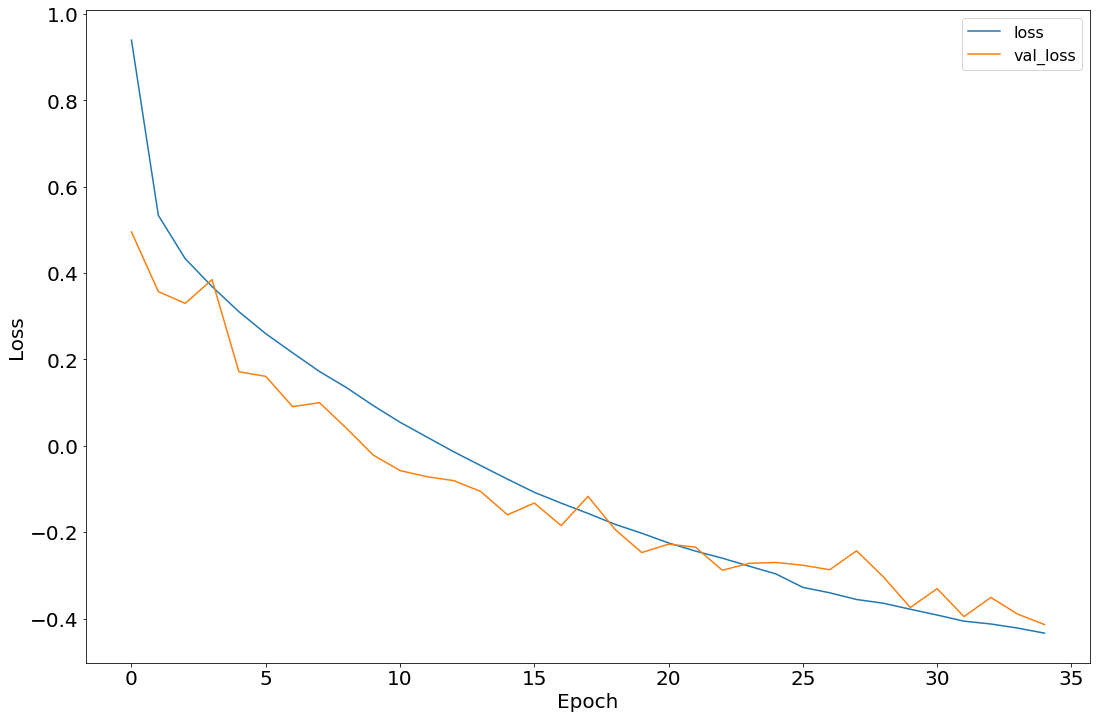

In [15]:
fig = plt.figure(figsize=(18, 12))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=16)
#plt.axhline(-1, color='0.8', ls='--')
#plt.show()


In [16]:
fig.savefig('data/models/loss_model_coords_0008_data_24102022.jpg', dpi=300, transparent=False)

### Save Model to file

In [17]:
# -----------------
# Define Model Name
# -----------------
model_file = 'data/models/model_{}_{:04d}_24102022_random_seed'
# -----------------

#plt.savefig('data/models/loss_model_coords2_0003_l1reg.png')

# check if directory needs to be created
model_dir = os.path.dirname(model_file.format(model_name, 0))
if not os.path.exists(model_dir):
    print('Creating Directory {}'.format(model_dir))
    os.makedirs(model_dir)

for i in range(1000):
    model_file_i = model_file.format(model_name, i)
    if not os.path.exists(model_file_i):
        print('Saving prediction to:', model_file_i)
        model.save(model_file_i)
        
        # save normalization model
        meta_file = os.path.join(
            model_file_i, 'normalization.txt')
        with open(meta_file, "w") as text_file:
            text_file.write(sensor_norm_file)
        
        # save meta data
        meta_file = os.path.join(
            model_file_i, 'meta.pkl')
        meta_data = {
            'add_coordinates': add_coordinates,
            'sensor_norm_file': sensor_norm_file,
        }
        with open(meta_file, "wb") as handle:
            pickle.dump(meta_data, handle, protocol=2)
        break


Saving prediction to: data/models/model_coords_0000_24102022_random_seed


INFO:tensorflow:Assets written to: data/models/model_coords_0000_24102022_random_seed/assets


INFO:tensorflow:Assets written to: data/models/model_coords_0000_24102022_random_seed/assets


## Evaluate Performance of Model 

#### Create ModelWrapper Instance

In [18]:
# from modules_lib.model import ModelWrapper

# model_file_i = 'data/models/model_coords_0000_do_005'

# model_wrapper = ModelWrapper(model_file_i)


#### Run Evaluation

In [19]:
# from modules_lib.model import likelihood, postprocess
# from modules_lib.data import get_vel_and_acc

# for normalized in [True]:
#     for run in range(7, 9):
#         print('Creating Run {} with normalization {}'.format(
#             run, normalized))
        
#         # get data
#         t_data = np.array(t_list[run])
#         X_data = np.array(X_list[run])
#         y_true = np.array(y_list[run])
        
#         # limit data and frequency
#         num_frames = 100
#         start = 0
#         every_nth = 2
#         t_data = t_data[::every_nth][start:start + num_frames]
#         y_true = y_true[::every_nth][start:start + num_frames]
#         X_data = X_data[::every_nth][start:start + num_frames]
        
#         # run ModelWrapper prediction before we alte the
#         # data tensors
#         mu_wrapper = model_wrapper.predict(
#             X_data, t_data, run_post_processing=True)
        
#         X_data = (X_data - sensor_bias) / sensor_std
#         X_data[~np.isfinite(X_data)] = 0
#         #X_data, y_true = flip_along_y_axis(X_data, y_true)
#         #X_data, y_true = shift_columns(X_data, y_true, n=15)
#         X_data = X_data[..., 6:]
        
#         if add_coordinates:
#             X_data = append_vicon_coords(X_data)

#         y_pred = model.predict(X_data)

#         # undo normalization of y_pred during training
#         # y_pred *= 10.
        
#         mu = y_pred[..., :2]
#         sigma = y_pred[..., 2:4]
#         r = y_pred[..., 4:]
        
#         # Run Evaluation
#         print('Plain Model Prediction')
#         print(np.mean(np.sum(np.sqrt((mu - y_true)**2), axis=1)))
#         vel, acc = get_vel_and_acc(mu, t_data)[:2]
#         print(np.max(vel), np.max(acc))
        
#         if False:
#             mu = postprocess(mu, sigma, r, t_data, 
#                              pre_fitting_size=None)

#             # Run Evaluation
#             print('After Post-Processing')
#             print(np.mean(np.sum(np.sqrt((mu - y_true)**2), axis=1)))
#             print(np.mean((mu - y_true)**2))
#             vel, acc = get_vel_and_acc(mu, t_data)[:2]
#             print(np.max(vel), np.max(acc))
        
#         # Run Evaluation
#         print('Model Wrapper Class')
#         print(np.mean(np.sum(np.sqrt((mu_wrapper - y_true)**2), axis=1)))
#         print(np.mean((mu_wrapper - y_true)**2))
#         vel, acc = get_vel_and_acc(mu_wrapper, t_data)[:2]
#         print(np.max(vel), np.max(acc))
        
#         if False:
#             create_complete_gif2(
#                 run, normalized=normalized, num_frames=num_frames,
#                 y_pred=mu,
#             )

In [20]:
# #0.12232663187172524
# #0.1542695253008115

# # get velocity and acceleration
# vel_abs, acc_abs, acc_parallel, acc_perp = \
#     get_vel_and_acc(mu_wrapper, t_data)

# plt.figure(figsize=(24, 4))
# plt.plot(vel_abs, label='|Velocity|')
# plt.plot(acc_abs, label='|Acceleration|')
# plt.axhline(np.max(vel_abs), ls='--', color='0.6', 
#            label='Max Vel.: {:3.3f}'.format(np.max(vel_abs)))
# plt.axhline(np.max(acc_abs), ls='--', color='0.6', 
#            label='Max Acc.: {:3.3f}'.format(np.max(acc_abs)))
# plt.axhline(.707, ls='-', color='.8', label='Reference: 707')
# plt.axhline(.717, ls='-', color='.8', label='Reference: 717')
# plt.legend()
# plt.show()

### Run Prediction on Test Data

In [21]:
# from modules_lib.model import ModelWrapper
# %load_ext autoreload
# %autoreload 2
# import sys
# import os
# # Laptop GPU is busy with rendering screen ...
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  
# import pickle
# import glob
# import pandas as pd
# import numpy as np
# from tqdm.notebook import tqdm
# from matplotlib import pyplot as plt
# from matplotlib.animation import FuncAnimation

# home_path = '/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter/'
# os.chdir(home_path)

# #model_file_i = 'data/models/model_augmented_0000_augmented'
# model_file_i = 'data/models/model_coords_0000_do_005' # model_coords_0000_do_005 model_coords_0002 model_coords_0000_10epoch

# model_wrapper = ModelWrapper(model_file_i)


In [22]:
# from modules_lib.data import KEYS as keys
# from modules_lib.data import get_data_from_data_frame
# from modules_lib.data import read_data

# #test_file = '../Dataset_sensor_floor/Dataset_Final/02092022/test/test.csv'

# path_dataset = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/30092022/test/'

# os.chdir(path_dataset)

# frames_test, y_test, t_test, X_test = read_data('test_2_7.csv')

In [23]:
# y_test[100]

In [24]:
# dt = np.diff(t_test, axis=0)
# indices = np.arange(len(dt)) + 1
# mask = np.abs(dt[:, 0]) > 3
# break_indices = np.append(indices[mask], len(t_test))

# plt.title('Test Splitting')
# plt.plot(t_test)
# for b in break_indices:
#     plt.axvline(b, color='0.8', ls='--')
# #plt.xlim(break_indices[1]-2, break_indices[1]+2)
# plt.ylabel('Time [s]')
# plt.xlabel('Frame Number')
# plt.show()

# plt.title('Test Splitting')
# plt.plot(dt)
# for b in break_indices:
#     plt.axvline(b, color='0.8', ls='--')
# plt.ylabel('Delta Time [s]')
# plt.xlabel('Frame Number')
# plt.show()


In [25]:
# frames_test_list = []
# y_test_list = []
# t_test_list = []
# X_test_list = []

# last_index = 0
# for b in break_indices:
#     y_test_list.append(y_test[last_index:b])
#     t_test_list.append(t_test[last_index:b])
#     X_test_list.append(X_test[last_index:b])
#     frames_test_list.append(frames_test[last_index:b])
    
#     plt.hist(np.diff(t_test_list[-1], axis=0), bins=100,
#              density=True, histtype='step')
#     print(np.sum(np.diff(t_test_list[-1], axis=0)>3),
#           len(t_test_list[-1]))
    
#     last_index = b

# assert len(X_test) == np.sum([len(t) for t in X_test_list])

# plt.xlabel('Delta Time [s]')
# plt.show()

In [26]:
# X_test.shape

In [27]:
# X_input_test = np.reshape(X_test[100], [-1, 23, 15, 10])
# t_input_test = np.reshape(t_test[100], [-1, 1])
# mu = model_wrapper.predict(X_input_test, t_input_test, run_post_processing=True, check_data=True)
# #mu_iter = model_wrapper.predict_iteratively(X_test[900:1150], t_test[900:1150],run_post_processing=True, check_data=True)
# #mu = model_wrapper.predict(X_input_test, t_input_test)
# print(mu)

In [28]:
# #test predict
# #missing nodes: 7-13, 20-9, 21-6, 23-5
# #X_input_test = np.reshape(X_test[750], [-1, 23, 15, 10])
# #t_input_test = np.reshape(t_test[750], [-1, 1])
# mu = model_wrapper.predict(X_test, t_test,run_post_processing=True, check_data=True)
# #mu_iter = model_wrapper.predict_iteratively(X_test[900:1150], t_test[900:1150],run_post_processing=True, check_data=True)
# #mu = model_wrapper.predict(X_input_test, t_input_test)
# print(mu)


In [29]:
# import seaborn as sns

# rssi_mat = X_test[450,:,:,9]
# fig = plt.figure(figsize=(14, 12))
          
# ax1 = fig.add_subplot(211)
# #ax1 = plt.subplots(figsize=(10,7))
# ax1 = sns.heatmap(rssi_mat, annot=False, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
# #ax1 = sns.heatmap(sensor_data[:,:,9], annot=False, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
# ax1.figure.axes[-1].yaxis.label.set_size(14)
       
# plt.title("RSSI Heatmap", fontsize = 16)
# plt.ylabel("Node ID", fontsize = 16)
# plt.xlabel("Strip ID", fontsize = 16)

# ax2 = fig.add_subplot(212)
# plt.xlim(-11.185, 10.185)
# plt.ylim(-6.425, 7.575)
# plt.title("Trajectory of robot", fontsize = 16)
# plt.ylabel("Y(t)", fontsize = 16)
# plt.xlabel("X(t)", fontsize = 16)
# plt.plot(y_test[:,0], y_test[:,1], label='Ground Truth', color='red')

***Predict the grid with augmentation***

In [30]:
# print(mu[:5,0],mu[:5,1])

In [31]:
# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# def convert_to_cell(x, y):
#     '''
#     This function takes a measurement in origin frame (x,y), convert it
#     to a cell number and return it as (strip_id, node_id)
#     '''
#     def translate(value, leftMin, leftMax, rightMin, rightMax):
#         # Figure out how 'wide' each range is
#         leftSpan = leftMax - leftMin
#         rightSpan = rightMax - rightMin

#         # Convert the left range into a 0-1 range (float)
#         valueScaled = 1.*(value - leftMin) / leftSpan

#         # Convert the 0-1 range into a value in the right range.
#         return rightMin + (valueScaled * rightSpan)

#     predict_cell = np.zeros([len(y), 2])
#     predict_cell[:, 0] = x + 11.185
#     predict_cell[:, 1] = translate(y, -15+7.575, 7.575, 15, 0)
#     predict_cell = np.round(predict_cell)

#     return predict_cell

# def convert_cell_to_vicon_coord(predict_cell):
#     vicon_grid_coord = np.zeros([len(predict_cell), 2])
#     print(len(predict_cell))
#     for i in range(len(predict_cell)):
#         mask = np.logical_and( df_vicon['strip_id'] == cell[i,0], df_vicon['node_id'] == cell[i,1])
#         print(i, cell[i,0], cell[i,1], mask)
#         x_coord = df_vicon.vicon_x[mask].values
#         y_coord = df_vicon.vicon_y[mask].values
#         print(x_coord, y_coord)
#         vicon_grid_coord[i, 0] = x_coord[0]
#         vicon_grid_coord[i, 1] = y_coord[0]
#         #vicon_grid_coord[0].append(x_coord[0])
#         #vicon_grid_coord[1].append(y_coord[0])
#     return vicon_grid_coord
        
    

# # def shift_columns(X, y, n=4, keep_unshifted=True):

# #     # get current cell indices
# #     strip_id = convert_to_cell(y[:,0], y[:,1])[:, 0]
    
# #     # get events where there is enough space left and right
# #     mask = np.logical_and(strip_id > n, strip_id < 22-n)
    
# #     if not keep_unshifted:
# #         #X = np.array(X[mask])
# #         y = np.array(y[mask])
# #         strip_id = strip_id[mask]

# #     # compute maximum allowed shift left or right
# #     shift_left = np.clip(strip_id - n, 0, float('inf'))
# #     shift_right = np.clip(22 - strip_id - n, 0, float('inf'))

# #     # sample random shift
# #     # Note: shift_right won't get sampled, but we use 0 
# #     # for that
# #     shifts = np.random.randint(
# #         low=-shift_left, 
# #         high=np.clip(shift_right, 1, float('inf')),
# #     )
# #     mask_z = shifts == 0
# #     shifts[mask_z] = shift_right[mask_z]
# #     mask = shifts == 0
# #     shifts[mask_z] = shift_left[mask_z]
    
# #     if keep_unshifted:
# #         shifts[mask] = 0
    
# #     # shift data
# #     #X = np.roll(X, shifts, axis=1)
# #     y[:, 0] += shifts
    
# #     return X, y

# cell = convert_to_cell(mu[:,0],mu[:,1])
# vicon_grids = convert_cell_to_vicon_coord(cell)

# print(cell,mu[350:400,:])
# print(vicon_grids)

In [32]:
# df_vicon.vicon_x[mask]

In [33]:
# mask = np.logical_and( df_vicon['strip_id'] == cell[0,0], df_vicon['node_id'] == cell[0,1])
# print(mask)
# x_coord = df_vicon.vicon_x[mask].values
# y_coord = df_vicon.vicon_y[mask].values

# # df_cell = df_vicon.index[(df_vicon['strip_id'] == cell[0,0]) & (df_vicon['node_id'] == cell[0,1])]
# # df_cell
# # x_coord = df_vicon.iat[df_cell,2]
# # y_coord = df_vicon.iat[df_cell,3]
# print(x_coord[0], y_coord[0])

In [34]:
# from turtle import color
# from matplotlib import pyplot as plt

# fig = plt.figure(figsize=(20, 12))

# plt.plot(y_test[:,0], y_test[:,1], label='Ground Truth', color='red')
# #plt.scatter(mu[:,0], mu[:,1], label = 'Prediction', color='green')
# plt.plot(mu[:,0], mu[:,1], label = 'Prediction', color='green')
# plt.scatter(df_vicon.vicon_x, df_vicon.vicon_y, label = 'Node Grids')
# #plt.scatter(cell[:,0], cell[:,1], label = 'Predicted Grids', color='orange')
# #plt.plot(mu_iter[:,0], mu_iter[:,1], label = 'Prediction_Iter')
# # plt.xlim(-11.185, 10.185)
# # plt.ylim(-6.425, 7.575)
# plt.xlabel('X(t)')
# plt.ylabel('Y(t)')
# plt.legend(loc='upper right')
# plt.title('Prediction vs Ground Truth')

In [35]:
# from turtle import color
# from matplotlib import pyplot as plt

# fig = plt.figure(figsize=(20, 12))

# ax1 = fig.add_subplot(211) #(row, column, pos)

In [36]:
# home_path = '/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter/'
# os.chdir(home_path)

# fig.savefig('data/models/predict_model_coords_data_30092022_with_do.jpg', dpi=300, transparent=False)

In [37]:
# num_frames = 100
# use_wrapper = True

# y_test_pred = []

# for split in tqdm(range(len(X_test_list))):
#     X_test_i = np.array(X_test_list[split])
#     t_test_i = np.array(t_test_list[split])
#     y_test_i = np.array(y_test_list[split])
    
#     if use_wrapper:
#         mu = model_wrapper.predict(X_test_i, t_test_i)
#     else:

#         X_test_norm_i = np.array((X_test_i - sensor_bias) / sensor_std)
#         X_test_norm_i[~np.isfinite(X_test_norm_i)] = 0
#         X_test_norm_i = X_test_norm_i[..., 6:]

#         y_test_pred_i = model.predict(X_test_norm_i)

#         mu = y_test_pred_i[..., :2]
#         sigma = y_test_pred_i[..., 2:4]
#         r = y_test_pred_i[..., 4:]

#         # Run Evaluation
#         vel, acc = get_vel_and_acc(mu, t_test_i)[:2]
#         print(np.max(vel), np.max(acc))

#         mu = postprocess(mu, sigma, r, t_test_i, 
#                          pre_fitting_size=None)

#     # Run Evaluation
#     vel, acc = get_vel_and_acc(mu, t_test_i)[:2]
#     print(np.max(vel), np.max(acc))
    
#     # append reconstructed positions to list
#     y_test_pred.append(mu)
    
    
# y_test_pred = np.concatenate(y_test_pred, axis=0)

# if False:
#     create_complete_gif2(
#         run, 
#         file_name='plots/gif_test_{norm}.gif',
#         normalized=True, num_frames=num_frames,
#         y_pred=y_test_pred,
#     )

In [38]:
# print(len(y_test_pred), len(X_test))
# assert len(y_test_pred) == len(X_test), len(y_test_pred)

# data_dict = {
#     'frame_number': range(len(y_test_pred)),
#     'vicon_x': y_test_pred[:, 0],
#     'vicon_y': y_test_pred[:, 1],
# }

# df_test_pred = pd.DataFrame(data_dict)
# df_test_pred = df_test_pred.set_index('frame_number')
# print(df_test_pred.head())

# test_pred_file = 'data/test_submission_{}_{:03d}.csv'
# for i in range(1000):
#     test_pred_file_i = test_pred_file.format(
#         os.path.basename(model_file_i), i)
#     if not os.path.exists(test_pred_file_i):
#         print('Saving prediction to:', test_pred_file_i)
#         df_test_pred.to_csv(test_pred_file_i)
#         break

#### Check Resolution

In [39]:
# t_test_pred = []
# for split in tqdm(range(len(X_test_list))):
#     t_test_i = np.array(t_test_list[split])
#     t_test_pred.append(t_test_i)
# t_test_pred = np.concatenate(t_test_pred, axis=0)

# # get velocity and acceleration
# vel_abs, acc_abs, acc_parallel, acc_perp = \
#     get_vel_and_acc(y_test_pred, t_test_pred)

# plt.figure(figsize=(64, 4))
# plt.plot(vel_abs, label='|Velocity|')
# plt.plot(acc_abs, label='|Acceleration|')
# plt.axhline(np.max(vel_abs), ls='--', color='0.6', 
#            label='Max Vel.: {:3.3f}'.format(np.max(vel_abs)))
# plt.axhline(np.max(acc_abs), ls='--', color='0.6', 
#            label='Max Acc.: {:3.3f}'.format(np.max(acc_abs)))
# plt.axhline(.707, ls='-', color='.8', label='Reference: 707')
# plt.axhline(.717, ls='-', color='.8', label='Reference: 717')
# plt.legend()
# plt.show()
    

In [40]:
# create_y_gif(
#     y_pred=y_test_pred[::5], 
#     y_true=None, 
#     file_name='plots/gif_y_prediction.gif')